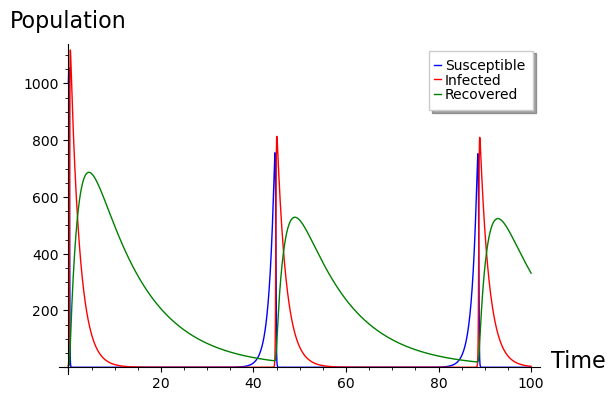

Graphics3d Object

In [11]:
#Differential Equation Model of the Basic SIR
var('S')
var('I')
var('R')
Sprime = 0.9*S - 0.02*S*I - 0.05*S
Iprime = 0.02*S*I - 0.4*I - 0.1*I
Rprime = 0.4*I - 0.09*R

S0 = 1000
I0 = 5
R0 = 5

#Simulating the model
t = srange(0, 100, 0.01)
simulation = desolve_odeint([Sprime, Iprime, Rprime], ics=[S0, I0, R0], dvars=[S, I, R], times=t)

Splot = list_plot(list(zip(t, simulation[:,0])), plotjoined=True, axes_labels=["Time", "Population"], legend_label="Susceptible")
Iplot = list_plot(list(zip(t, simulation[:,1])), plotjoined=True, legend_label="Infected", color="red")
Rplot = list_plot(list(zip(t, simulation[:,2])), plotjoined=True, legend_label="Recovered", color="green")

#plotting the model
show(Splot + Iplot + Rplot)

show(list_plot(simulation, plotjoined = True, axes_labels = ["Susceptible", "Infected", "Recovered"]))


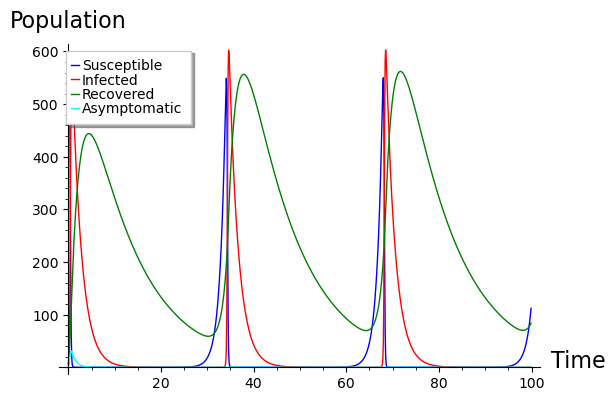

In [10]:
#Base Differential Equation Model of the Extended SIR
var('S')
var('I')
var('R')
var("A")
Sprime = 0.9*S - 0.01*S*A - 0.02*S*I -0.05*S
Aprime = 0.01*S*A - 0.3*A - 0.7*A - 0.02*A
Iprime = 0.02*S*I + 0.7*A - 0.4*I - 0.10*I
Rprime = 0.3*A + 0.4*I - 0.09*R + 0.25*S



S0 = 500
I0 = 5
R0 = 5
A0 = 5

t = srange(0, 100, 0.1)
simulation = desolve_odeint([Sprime, Iprime, Rprime, Aprime], ics=[S0, I0, R0, A0], dvars=[S, I, R, A], times=t)

Splot = list_plot(list(zip(t, simulation[:,0])), plotjoined=True, axes_labels=["Time", "Population"], legend_label="Susceptible")
Iplot = list_plot(list(zip(t, simulation[:,1])), plotjoined=True, legend_label="Infected", color="red")
Rplot = list_plot(list(zip(t, simulation[:,2])), plotjoined=True, legend_label="Recovered", color="green")
Aplot = list_plot(list(zip(t, simulation[:,3])), plotjoined=True, legend_label="Asymptomatic", color="aqua")


#plotting the model
show(Splot + Iplot + Rplot + Aplot)

In [24]:
@interact
def plot_extended_SIR(rate=(0.001, 0.039, 0.01)):
    Sprime = 0.9*S - 0.01*S*A - rate*S*I -0.05*S
    Aprime = 0.01*S*A - 0.3*A - 0.7*A - 0.02*A
    Iprime = rate*S*I + 0.7*A - 0.4*I - 0.10*I
    Rprime = 0.3*A + 0.4*I - 0.09*R

    S0 = 500
    A0 = 5
    I0 = 5
    R0 = 5

    t = srange(0, 100, 0.01)
    simulation = desolve_odeint([Sprime, Iprime, Rprime, Aprime], ics=[S0, I0, R0, A0], dvars=[S, I, R, A], times=t)

    Splot = list_plot(list(zip(t, simulation[:,0])), plotjoined=True, axes_labels=["Time", "Population"], legend_label="Susceptible")
    Iplot = list_plot(list(zip(t, simulation[:,1])), plotjoined=True, legend_label="Infected", color="red")
    Rplot = list_plot(list(zip(t, simulation[:,2])), plotjoined=True, legend_label="Recovered", color="green")
    Aplot = list_plot(list(zip(t, simulation[:,3])), plotjoined=True, legend_label="Asymptomatic", color="aqua")

    show(Splot + Iplot + Rplot + Aplot)


Interactive function <function plot_extended_SIR at 0x7f2e003dc940> with 1 widget
  rate: FloatSlider(value=0.…

In [44]:
#Base Differential Equation Model of the Extended SIR
var('S')
var('I')
var('R')
var("A")
Sprime = 0.9*S - 0.01*S*A - 0.02*S*I -0.05*S
Aprime = 0.01*S*A - 0.3*A - 0.7*A - 0.02*A
Iprime = 0.02*S*I + 0.7*A - 0.4*I - 0.10*I
Rprime = 0.3*A + 0.4*I - 0.09*R

#computing the equilibrium points of the differential equations
solutions = solve([Sprime, Aprime, Iprime, Rprime], [S,A,I,R])
show(solutions)

#computing the partial derivatives to get the jacobian matrix
Jacobian_Matrix_Derivative = Matrix(
            [[Sprime.diff(S), Sprime.diff(A), Sprime.diff(I), S_prime.diff(R)],
            [Aprime.diff(S), Aprime.diff(A), Aprime.diff(I), Aprime.diff(R)],
            [Iprime.diff(S), Iprime.diff(A), Iprime.diff(I), Iprime.diff(R)],
            [Rprime.diff(S), Rprime.diff(A), Rprime.diff(I), Rprime.diff(R)]])

show(Jacobian_Matrix_Derivative)

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")


# computing the jacobian matrix by finding the partial deriviatives
for i in srange(3):
    Jacobian_Matrix = Matrix(
                [[Sprime.diff(S).subs(solutions[i]), Sprime.diff(A).subs(solutions[i]), Sprime.diff(I).subs(solutions[i]), S_prime.diff(R).subs(solutions[i])],
                [Aprime.diff(S).subs(solutions[i]), Aprime.diff(A).subs(solutions[i]), Aprime.diff(I).subs(solutions[i]), Aprime.diff(R).subs(solutions[i])],
                [Iprime.diff(S).subs(solutions[i]), Iprime.diff(A).subs(solutions[i]), Iprime.diff(I).subs(solutions[i]), Iprime.diff(R).subs(solutions[i])],
                [Rprime.diff(S).subs(solutions[i]), Rprime.diff(A).subs(solutions[i]), Rprime.diff(I).subs(solutions[i]), Rprime.diff(R).subs(solutions[i])]])
    show(Jacobian_Matrix)
    print(Jacobian_Matrix.eigenvalues())
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

[[S == 0, A == 0, I == 0, R == 0], [S == 25, A == 0, I == (85/2), R == (1700/9)], [S == 102, A == 935, I == -425, R == (11050/9)]]

[-0.0100000000000000*A - 0.0200000000000000*I + 0.850000000000000                                            -0.0100000000000000*S                                            -0.0200000000000000*S                                                                0]
[                                            0.0100000000000000*A                          0.0100000000000000*S - 1.02000000000000                                                                0                                                                0]
[                                            0.0200000000000000*I                                                0.700000000000000                         0.0200000000000000*S - 0.500000000000000                                                                0]
[                                                               0                                                0.300000000000000                                                0.400000000000000                                              -0.0900000000000000]

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


[  0.850000000000000                   0                   0                   0]
[                  0   -1.02000000000000                   0                   0]
[                  0   0.700000000000000  -0.500000000000000                   0]
[                  0   0.300000000000000   0.400000000000000 -0.0900000000000000]

[-9/100, -51/50, 17/20, -1/2]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


[  0.000000000000000  -0.250000000000000  -0.500000000000000                   0]
[                  0  -0.770000000000000                   0                   0]
[  0.850000000000000   0.700000000000000   0.000000000000000                   0]
[                  0   0.300000000000000   0.400000000000000 -0.0900000000000000]

[-1/20*I*sqrt(17)*sqrt(10), 1/20*I*sqrt(17)*sqrt(10), -77/100, -9/100]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


[  0.000000000000000   -1.02000000000000   -2.04000000000000                   0]
[   9.35000000000000   0.000000000000000                   0                   0]
[  -8.50000000000000   0.700000000000000    1.54000000000000                   0]
[                  0   0.300000000000000   0.400000000000000 -0.0900000000000000]

[-1/2*(17/1500000*I*sqrt(12171000251)*sqrt(10) + 4734499/1687500)^(1/3)*(I*sqrt(3) + 1) - 128903/90000*(-I*sqrt(3) + 1)/(17/1500000*I*sqrt(12171000251)*sqrt(10) + 4734499/1687500)^(1/3) + 77/150, -1/2*(17/1500000*I*sqrt(12171000251)*sqrt(10) + 4734499/1687500)^(1/3)*(-I*sqrt(3) + 1) - 128903/90000*(I*sqrt(3) + 1)/(17/1500000*I*sqrt(12171000251)*sqrt(10) + 4734499/1687500)^(1/3) + 77/150, (17/1500000*I*sqrt(12171000251)*sqrt(10) + 4734499/1687500)^(1/3) + 128903/45000/(17/1500000*I*sqrt(12171000251)*sqrt(10) + 4734499/1687500)^(1/3) + 77/150, -9/100]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [37]:
for num in range(3):
    show(num)

0

1

2

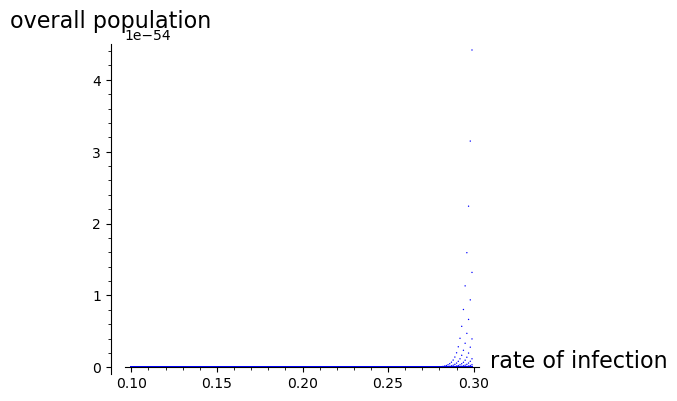

In [59]:
#10
var("x")
master_list = []
for r in srange(0.1, 0.3, 0.001):
    f(x) = r * x
    x = [0.4]
    for i in srange(1000):
        x.append(f(x[-1]))
    master_list += list(zip([r for i in range(len(x[101:]))], x[101:]))
    list_plot(master_list, axes_labels = ['rate of infection', 'overall population'], size = 1)